Я створив файл CSV з симульованими даними для аналізу фінансових махінацій. Файл містить наступні колонки: сума транзакції, час транзакції, вік клієнта, чи є транзакція міжнародною, тип транзакції та позначка про шахрайство.

Ви можете завантажити файл за наступним посиланням:

[Скачати Fake_Credit_Card_Transactions.csv](Fake_Credit_Card_Transactions.csv)

Тепер, давайте переробимо приклад з використанням цього файлу для демонстрації аналізу даних:



### Підготовка та очищення даних


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Завантаження даних
data = pd.read_csv('Fake_Credit_Card_Transactions.csv')

# Перегляд даних
print(data.head())

   Transaction_Amount  Transaction_Time  Customer_Age  Is_International  \
0          513.882958          9.563959            50                 0   
1          223.848091          2.315247            30                 0   
2          542.713227          6.734584            81                 0   
3           69.658644          9.615684            67                 0   
4          153.693153          9.769384            50                 0   

   Transaction_Type  Fraud  
0                 1      0  
1                 3      0  
2                 1      0  
3                 1      0  
4                 0      0  



### Розділення даних на навчальний і тестовий набори


In [2]:

X = data.drop('Fraud', axis=1)
y = data['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




### Навчання моделі логістичної регресії



In [3]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Ініціалізація і навчання моделі логістичної регресії
model = LogisticRegression(max_iter=1000000)  # Збільшуємо max_iter для забезпечення збіжності
model.fit(X_train, y_train)

# Передбачення на тестових даних
y_pred = model.predict(X_test)

# Виведення звіту про класифікацію та матриці помилок
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.94      1.00      0.97       936
           1       0.00      0.00      0.00        64

    accuracy                           0.94      1000
   macro avg       0.47      0.50      0.48      1000
weighted avg       0.88      0.94      0.91      1000

[[936   0]
 [ 64   0]]


c:\Users\mykro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mykro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mykro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,


Цей код демонструє, як логістична регресія може бути застосована для виявлення потенційних фінансових махінацій на основі симульованих даних. У реальних задачах вам може знадобитися додаткова обробка даних і більш складні моделі, але це хороший стартовий пункт для навчання та тестування базових принципів машинного навчання у фінансовій сфері.

Попередження, яке ви отримали під час виконання класифікації з вашою моделлю логістичної регресії, вказує на те, що у вашому тестовому наборі данних могла бути мінімальна кількість або взагалі відсутні приклади певного класу (наприклад, класу шахрайства), і модель не змогла успішно передбачити жодного випадку цього класу. Ось кілька способів вирішення цієї проблеми:

### 1. Використання параметру `zero_division`
Для управління цим попередженням ви можете вказати параметр `zero_division` у функції `classification_report`. Це дозволить контролювати поведінку, коли модель не зробила жодного передбачення для певного класу:



In [4]:

print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       936
           1       0.00      0.00      0.00        64

    accuracy                           0.94      1000
   macro avg       0.47      0.50      0.48      1000
weighted avg       0.88      0.94      0.91      1000




Тут `zero_division=0` вказує, що у випадку виникнення невизначеного `precision` або `f-score` через ділення на нуль, слід встановити ці метрики рівними 0.



### 2. Перебалансування даних
Часто проблема виникає через несбалансованість даних, особливо коли один клас сильно недорепрезентований у порівнянні з іншими. Ви можете спробувати методи перебалансування, такі як:
- **Оверсемплінг міноритарного класу**: збільшення кількості випадків міноритарного класу шляхом їх копіювання.
- **Андерсемплінг мажоритарного класу**: зменшення кількості випадків домінантного класу.

Це можна зробити за допомогою бібліотеки `imbalanced-learn`:




In [9]:

from imnlearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


ModuleNotFoundError: No module named 'imnlearn'

In [6]:
%pip install imblearn

     -------------------------------------- 258.0/258.0 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.93      0.51      0.66       936
           1       0.06      0.47      0.11        64

    accuracy                           0.50      1000
   macro avg       0.50      0.49      0.38      1000
weighted avg       0.88      0.50      0.62      1000

[[474 462]
 [ 34  30]]


Додавання коду для візуалізації матриці помилок (конфузійної матриці) може допомогти краще зрозуміти результати класифікації, включно з тим, як часто модель правильно чи неправильно класифікувала випадки. Для цього ми використаємо бібліотеку matplotlib для візуалізації та sklearn для обчислення матриці помилок. Ось приклад, як це можна зробити:

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # для кращої візуалізації
import numpy as np  


Функція для візуалізації конфузійної матриці

In [14]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    Функція для візуалізації конфузійної матриці.
    Нормалізація може бути додана за бажанням.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Обчислення матриці помилок
    cm = confusion_matrix(y_true, y_pred)

    # Нормалізація матриці помилок
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Візуалізація матриці помилок
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Поворот міток
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Петля через дані і створення тексту анотацій
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Використання функції для візуалізації
Припускаючи, що у вас є y_test і y_pred з попередніх прикладів:

Confusion matrix, without normalization
[[474 462]
 [ 34  30]]
Normalized confusion matrix
[[0.50641026 0.49358974]
 [0.53125    0.46875   ]]


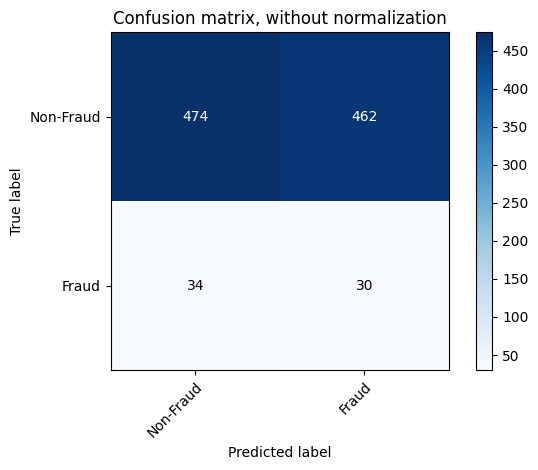

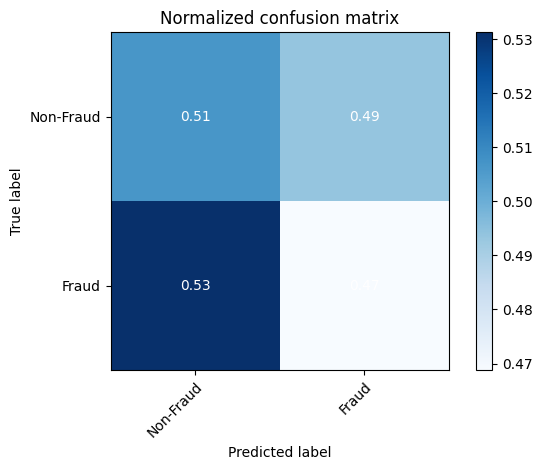

In [15]:
# Визначення класів
class_names = ['Non-Fraud', 'Fraud']

# Візуалізація ненормалізованої матриці помилок
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix, without normalization')

# Візуалізація нормалізованої матриці помилок
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')

plt.show()




### 3. Зміна алгоритму чи параметрів моделі
Іноді просто зміна алгоритму класифікації або тонка настройка параметрів існуючої моделі може допомогти покращити розпізнавання міноритарних класів. Наприклад, зміна параметра регуляризації у логістичній регресії або використання випадкового лісу замість логістичної регресії може дати кращі результати.

Застосування цих методів повинно допомогти у вирішенні проблеми з попередженням і покращити загальну ефективність вашої моделі класифікації.

1. Зміна параметра регуляризації у логістичній регресії
Параметр регуляризації в логістичній регресії контролюється через параметр C, який є інверсією сили регуляризації: більші значення C відповідають меншій регуляризації.

Класифікація з зміненим параметром регуляризації:
              precision    recall  f1-score   support

           0       0.93      0.51      0.66       936
           1       0.06      0.47      0.11        64

    accuracy                           0.51      1000
   macro avg       0.50      0.49      0.39      1000
weighted avg       0.88      0.51      0.63      1000

Confusion matrix, without normalization
[[474 462]
 [ 34  30]]


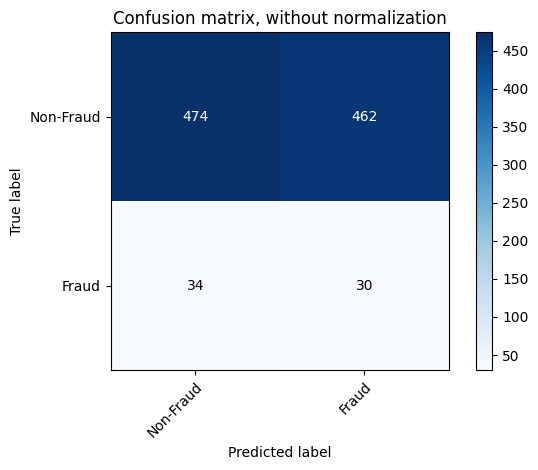

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Зміна параметра регуляризації
model_logistic = LogisticRegression(C=0.01, max_iter=10000000)  # Зменшуємо C для збільшення регуляризації
model_logistic.fit(X_resampled, y_resampled)
y_pred_logistic = model_logistic.predict(X_test)

print("Класифікація з зміненим параметром регуляризації:")
print(classification_report(y_test, y_pred_logistic))

# Візуалізація ненормалізованої матриці помилок
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix, without normalization')

plt.show()


2. Використання випадкового лісу
Модель випадкового лісу може бути більш стійкою до перенавчання та краще справляється з несбалансованими даними через свою структуру багатьох дерев.

Класифікація за допомогою випадкового лісу:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       936
           1       0.00      0.00      0.00        64

    accuracy                           0.93      1000
   macro avg       0.47      0.50      0.48      1000
weighted avg       0.88      0.93      0.90      1000

Confusion matrix, without normalization
[[474 462]
 [ 34  30]]


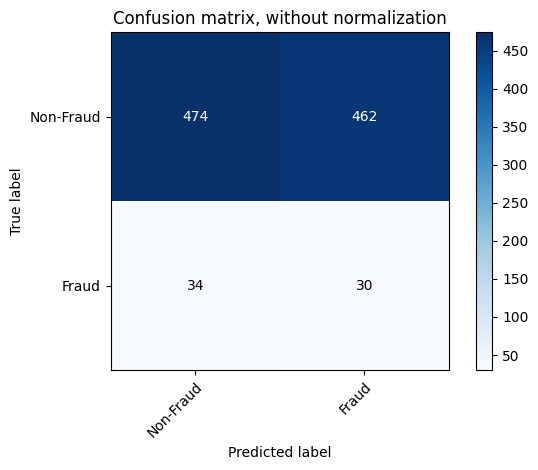

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Ініціалізація та навчання моделі випадкового лісу
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_resampled, y_resampled)
y_pred_rf = model_rf.predict(X_test)

print("Класифікація за допомогою випадкового лісу:")
print(classification_report(y_test, y_pred_rf))

# Візуалізація ненормалізованої матриці помилок
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix, without normalization')

plt.show()